# In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Objective:    
What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
#importing library for data retrieving and ploting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#retrieving data from url
remote_data = 'http://bit.ly/w-data'
students_data = pd.read_csv(remote_data)

#Describing data
print(students_data.describe())

# To show first 10 data
students_data.head(10)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting

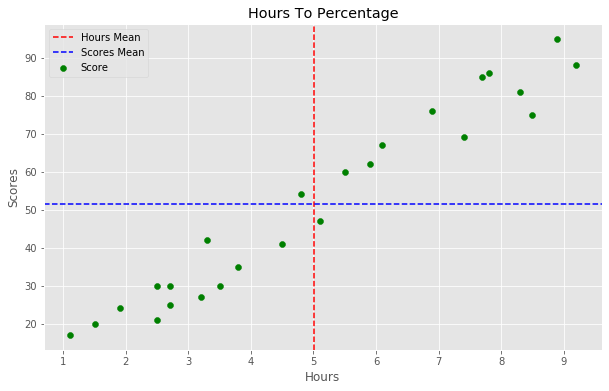

In [4]:
#plotting the distribution of scores

#plot style
plt.style.use('ggplot') 

#plotting scattered graph
fig, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(x = students_data['Hours'],
                    y = students_data['Scores'],
                    c = 'Green')

#setting Titles and lables
ax.set(title = 'Hours To Percentage',
      xlabel = 'Hours',
      ylabel = 'Scores')

#Dotted vertical and horizontal mean of Hours and Scores
hours_mean = ax.axvline(students_data['Hours'].mean(),
                        linestyle = '--',
                        c = 'Red')
scores_mean = ax.axhline(students_data['Scores'].mean(),
                         linestyle = '--',
                         c = 'Blue' )

#adding legend
plt.legend(('Hours Mean','Scores Mean','Score'))

plt.show()

## Preparing the data for training

In [5]:
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [57]:
x = students_data.iloc[:, :-1].values  
y = students_data.iloc[:, 1].values 
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


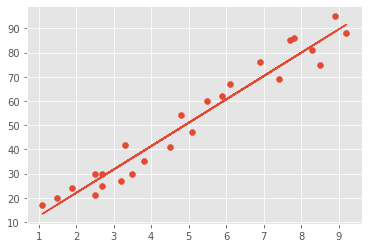

In [38]:
#plotting the regression line
r_line = regressor.coef_ * x + regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x, r_line)
plt.show()

## Choosing the right model

In [39]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

## Fitting the model to training data

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
print("Training succesful")

Training succesful


## Making predictions

In [44]:
y_preds= regressor.predict(x_test)
print(x_test)
print(y_preds)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [45]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_preds})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [59]:
#Testing the model
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of Hours = ", hours)
print("Predicted Score = ", prediction)

No of Hours =  9.25
Predicted Score =  [93.69173249]


## Evaluating the model

In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_preds)) 

Mean Absolute Error: 4.183859899002975
